In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Data Importation of Federal Fund Rates, Consumer Price Indexes, Unemployment Rates, and Gross Domestic Product

In [2]:
fed_rates_path = "C:/Users/lamae/OneDrive/Desktop/FEDFUNDS (1).csv"
CPI_path = "C:/Users/lamae/OneDrive/Desktop/CPALTT01USQ657N.csv"
unemployment_path = "C:/Users/lamae/OneDrive/Desktop/UNRATE (2).csv"
GDP_path = "C:/Users/lamae/OneDrive/Desktop/GDP.csv"

fed_rates = pd.read_csv(fed_rates_path)
CPI = pd.read_csv(CPI_path)
Unemp = pd.read_csv(unemployment_path)
GDP = pd.read_csv(GDP_path)

Organizing all files for two specific periods. Trump Years: (2017-2021) Biden Years: (2021-Current)

In [3]:
fed_rates.rename(columns={'FEDFUNDS':'Interest Rates'},inplace=True)
fed_rates['DATE'] = pd.to_datetime(fed_rates['DATE'])
fed_rates


,DATE,Interest Rates
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
834,2024-01-01,5.33
835,2024-02-01,5.33
836,2024-03-01,5.33
837,2024-04-01,5.33


In [4]:
CPI.rename(columns={'CPALTT01USQ657N':'CPI'},inplace=True)
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI

,DATE,CPI
0,1955-04-01,0.000000
1,1955-07-01,0.499376
2,1955-10-01,0.124224
3,1956-01-01,-0.248139
4,1956-04-01,0.870647
...,...,...
271,2023-01-01,1.044907
272,2023-04-01,1.192332
273,2023-07-01,0.866427
274,2023-10-01,0.104508


In [5]:
Unemp['DATE'] = pd.to_datetime(Unemp['DATE'])
Unemp

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
912,2024-01-01,3.7
913,2024-02-01,3.9
914,2024-03-01,3.8
915,2024-04-01,3.9


In [6]:
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP

,DATE,GDP
0,1975-07-01,1709.820
1,1975-10-01,1761.831
2,1976-01-01,1820.487
3,1976-04-01,1852.332
4,1976-07-01,1886.558
...,...,...
190,2023-01-01,26813.601
191,2023-04-01,27063.012
192,2023-07-01,27610.128
193,2023-10-01,27956.998


Splicing Date into two data sets: Trump Presidency and Biden Presidency

In [7]:
# Dates of Presidencies: Federal Fund Rates, Unemployment, Consumer Price Index and GDP
# Dates will be based on the GDP release date by quarters

# Reagan Dates in Office: 
reagan_start_date = '1981-04-01'
reagan_end_date = '1989-01-01'

# Bush I Dates in Office: 
bush_start_date = '1989-04-01'
bush_end_date = '1993-01-01'


# Clinton Dates in Office: 
clinton_start_date = '1993-04-01'
clinton_end_date = '2001-01-01'

# Bush II Dates in Office: 
bushII_start_date = '2001-04-01'
bushII_end_date = '2009-01-01'

# Obama Dates in Office: 
obama_start_date = '2009-04-01'
obama_end_date = '2017-01-01'

# Trump Dates in Office: 
trump_start_date = '2017-04-01'
trump_end_date = '2021-01-01'

# Biden Dates in Office: 
biden_start_date = '2021-04-01'
biden_end_date = '2024-04-01'

Creating the Data Frame for Trump to Biden Term

In [8]:
df = fed_rates.merge(Unemp,on="DATE").merge(CPI,on='DATE').merge(GDP,on="DATE")
df  = df[(df['DATE'] >= reagan_start_date) & (df['DATE'] <= biden_end_date)]

# President Labels
df['President'] = ''
df.loc[(df['DATE'] >= reagan_start_date) & (df['DATE'] <= reagan_end_date), 'President'] = 'Reagan'
df.loc[(df['DATE'] >= bush_start_date) & (df['DATE'] <= bush_end_date), 'President'] = 'Bush I'
df.loc[(df['DATE'] >= bushII_start_date) & (df['DATE'] <= bushII_end_date), 'President'] = 'Bush II'
df.loc[(df['DATE'] >= clinton_start_date) & (df['DATE'] <= clinton_end_date), 'President'] = 'Clinton'
df.loc[(df['DATE'] >= obama_start_date) & (df['DATE'] <= obama_end_date), 'President'] = 'Obama'
df.loc[(df['DATE'] >= trump_start_date) & (df['DATE'] <= trump_end_date), 'President'] = 'Trump'
df.loc[(df['DATE'] >= biden_start_date) & (df['DATE'] <= biden_end_date), 'President'] = 'Biden'


df['Int_Rate_PCT'] = df['Interest Rates'].pct_change()*100
df['UNRATE_PCT'] = df['UNRATE'].pct_change()*100
df['CPI_PCT'] = df['CPI'].pct_change()*100
df['GDP_PCT'] = df['GDP'].pct_change()*100
df = df[1:]
df

,DATE,Interest Rates,UNRATE,CPI,GDP,President,Int_Rate_PCT,UNRATE_PCT,CPI_PCT,GDP_PCT
24,1981-07-01,19.04,7.2,2.820037,3260.609,Reagan,21.119593,0.000000,21.770127,3.101218
25,1981-10-01,15.08,7.9,1.443522,3280.818,Reagan,-20.798319,9.722222,-48.811943,0.619792
26,1982-01-01,13.22,8.6,0.818214,3274.302,Reagan,-12.334218,8.860759,-43.318214,-0.198609
27,1982-04-01,14.94,9.3,1.517290,3331.972,Reagan,13.010590,8.139535,85.439232,1.761291
28,1982-07-01,12.59,9.8,1.876955,3366.322,Reagan,-15.729585,5.376344,23.704440,1.030921
...,...,...,...,...,...,...,...,...,...,...
190,2023-01-01,4.33,3.4,1.044907,26813.601,Biden,40.584416,-5.555556,184.590622,1.534345
191,2023-04-01,4.83,3.4,1.192332,27063.012,Biden,11.547344,0.000000,14.108976,0.930166
192,2023-07-01,5.12,3.5,0.866427,27610.128,Biden,6.004141,2.941176,-27.333459,2.021638
193,2023-10-01,5.33,3.8,0.104508,27956.998,Biden,4.101562,8.571429,-87.938073,1.256314


In [9]:
df['Recession'] = 0
df.loc[df['GDP_PCT']<0,'Recession'] = 1
df['Unemployment Decline'] = 0 
df.loc[df['UNRATE_PCT']<0,'Unemployment Decline']=1
df['Interest Rates Rising'] = 0
df.loc[3.0<df['Interest Rates'],'Interest Rates Rising'] = 1
df['CPI Increase'] = 0 
df.loc[3.0<df['CPI_PCT'],'CPI Increase'] = 1
df

,DATE,Interest Rates,UNRATE,CPI,GDP,President,Int_Rate_PCT,UNRATE_PCT,CPI_PCT,GDP_PCT,Recession,Unemployment Decline,Interest Rates Rising,CPI Increase
24,1981-07-01,19.04,7.2,2.820037,3260.609,Reagan,21.119593,0.000000,21.770127,3.101218,0,0,1,1
25,1981-10-01,15.08,7.9,1.443522,3280.818,Reagan,-20.798319,9.722222,-48.811943,0.619792,0,0,1,0
26,1982-01-01,13.22,8.6,0.818214,3274.302,Reagan,-12.334218,8.860759,-43.318214,-0.198609,1,0,1,0
27,1982-04-01,14.94,9.3,1.517290,3331.972,Reagan,13.010590,8.139535,85.439232,1.761291,0,0,1,1
28,1982-07-01,12.59,9.8,1.876955,3366.322,Reagan,-15.729585,5.376344,23.704440,1.030921,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2023-01-01,4.33,3.4,1.044907,26813.601,Biden,40.584416,-5.555556,184.590622,1.534345,0,1,1,1
191,2023-04-01,4.83,3.4,1.192332,27063.012,Biden,11.547344,0.000000,14.108976,0.930166,0,0,1,1
192,2023-07-01,5.12,3.5,0.866427,27610.128,Biden,6.004141,2.941176,-27.333459,2.021638,0,0,1,0
193,2023-10-01,5.33,3.8,0.104508,27956.998,Biden,4.101562,8.571429,-87.938073,1.256314,0,0,1,0


In [10]:
president_final_score = pd.pivot_table(
    df, 
    values = ['Recession','Unemployment Decline', 'Interest Rates Rising', 'CPI Increase'], 
    index = 'President',
    aggfunc='sum'
)
president_final_score

,CPI Increase,Interest Rates Rising,Recession,Unemployment Decline
President,,,,
Biden,6,6,0,8
Bush I,7,16,1,2
Bush II,15,13,4,12
Clinton,14,30,0,22
Obama,10,0,1,20
Reagan,11,31,1,17
Trump,5,0,2,10


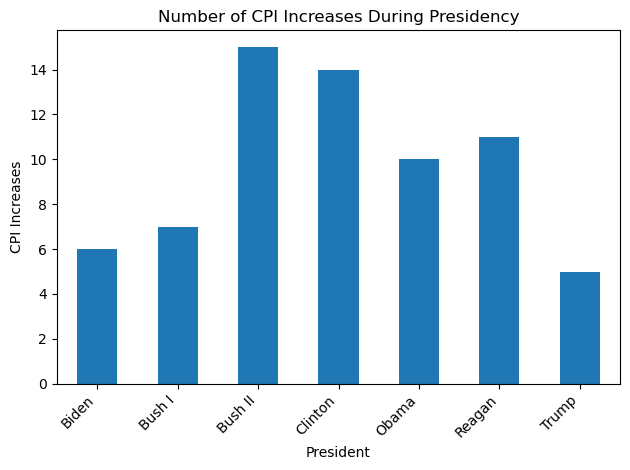

In [11]:
president_final_score_reset = president_final_score.reset_index()
president_final_score_reset.plot(kind='bar',x='President',y='CPI Increase',legend=False)
plt.xlabel('President')
plt.ylabel('CPI Increases')
plt.title('Number of CPI Increases During Presidency')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

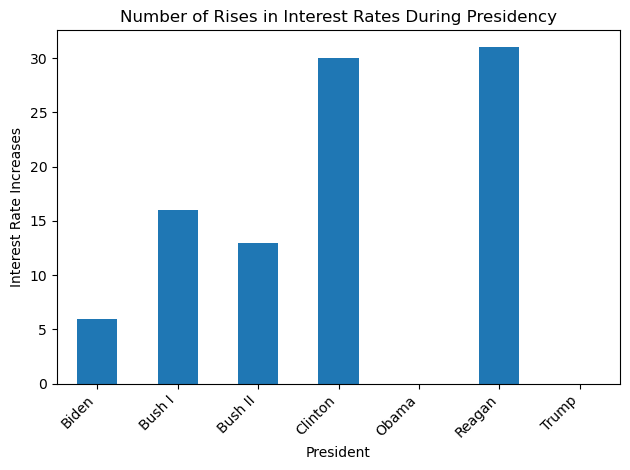

In [12]:
president_final_score_reset = president_final_score.reset_index()
president_final_score_reset.plot(kind='bar',x='President',y='Interest Rates Rising',legend=False)
plt.xlabel('President')
plt.ylabel('Interest Rate Increases')
plt.title('Number of Rises in Interest Rates During Presidency')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

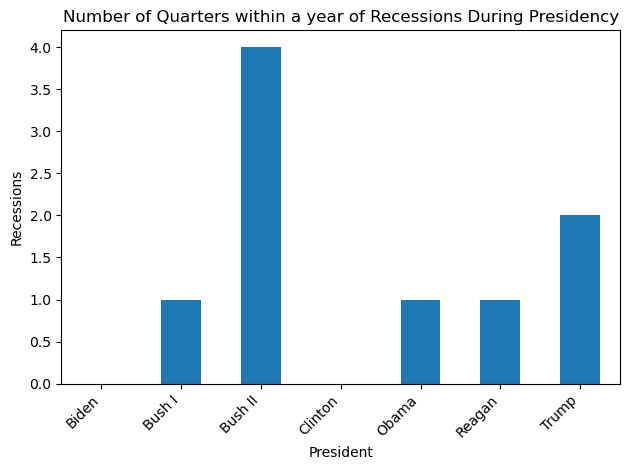

In [13]:
president_final_score_reset = president_final_score.reset_index()
president_final_score_reset.plot(kind='bar',x='President',y='Recession',legend=False)
plt.xlabel('President')
plt.ylabel('Recessions')
plt.title('Number of Quarters within a year of Recessions During Presidency')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

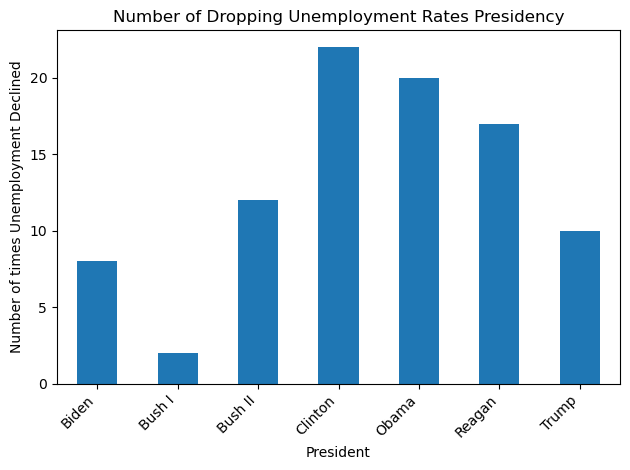

In [14]:
president_final_score_reset = president_final_score.reset_index()
president_final_score_reset.plot(kind='bar',x='President',y='Unemployment Decline',legend=False)
plt.xlabel('President')
plt.ylabel('Number of times Unemployment Declined')
plt.title('Number of Dropping Unemployment Rates Presidency')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()